In [172]:
 import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/Fraud detection data.xlsx")

In [169]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [173]:
#get rid of cateogircal variables we dont need 
df=df.drop(columns=['nameOrig','nameDest'])
# convert type into a numerical variable
df1=pd.get_dummies(df['type'])
# combine the data frames
df2=np.concatenate([df,df1],axis=1)
df2=pd.DataFrame(df2)
df2.columns=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']
df2=df2.drop(columns=['type'])
df2.head(2000)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,1
3,1,181.0,181.0,0.0,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,6511.48,3216707.72,3210196.24,0.0,0.0,0,0,0,0,1,0
1996,1,8592.89,3210196.24,3201603.35,0.0,0.0,0,0,0,0,1,0
1997,1,2356.99,34681.0,32324.01,2643188.16,2025098.66,0,0,0,1,0,0
1998,1,287126.39,1861352.98,1574226.59,29078.22,139915.18,0,0,1,0,0,0


In [174]:
# Identify the columns in the DataFrame that contain numerical data
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Get descriptive statistics for numerical data
num_desc = df[num_cols].describe ()
print(num_desc)

         step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  2000.0  2.000000e+03   2.000000e+03    2.000000e+03    2.000000e+03   
mean      1.0  1.110683e+05   7.777705e+05    7.922747e+05    6.894399e+05   
std       0.0  2.595018e+05   1.949950e+06    1.991116e+06    2.126404e+06   
min       1.0  8.730000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%       1.0  3.980838e+03   0.000000e+00    0.000000e+00    0.000000e+00   
50%       1.0  1.046386e+04   1.893740e+04    8.897910e+03    0.000000e+00   
75%       1.0  1.233343e+05   1.100678e+05    1.034279e+05    3.629678e+05   
max       1.0  3.776389e+06   1.010284e+07    1.024625e+07    1.941527e+07   

       newbalanceDest      isFraud  
count    2.000000e+03  2000.000000  
mean     1.015310e+06     0.007000  
std      3.008978e+06     0.083394  
min      0.000000e+00     0.000000  
25%      0.000000e+00     0.000000  
50%      0.000000e+00     0.000000  
75%      2.907726e+05     0.000000  
m

In [175]:
# box plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")

<Axes: xlabel='amount'>

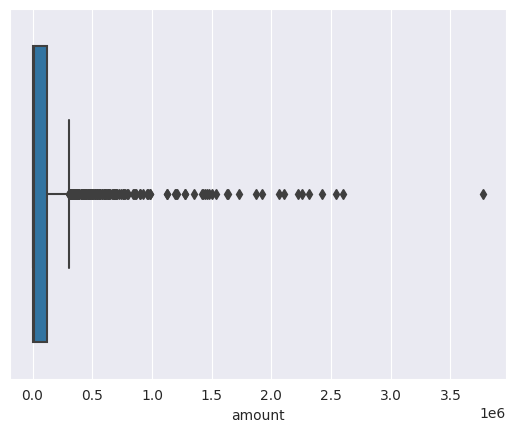

In [176]:
sns.boxplot(x=df["amount"])

<Axes: xlabel='oldbalanceOrg'>

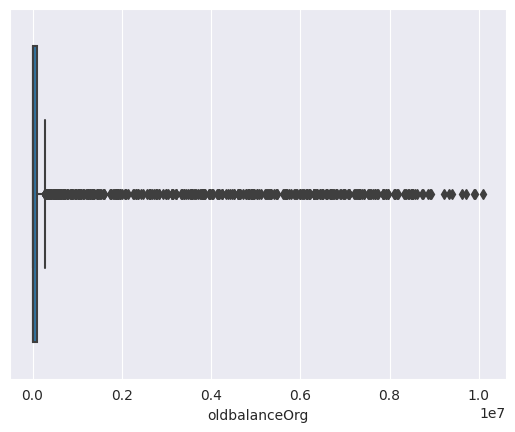

In [177]:
sns.boxplot(x=df["oldbalanceOrg"])

<Axes: xlabel='newbalanceOrig'>

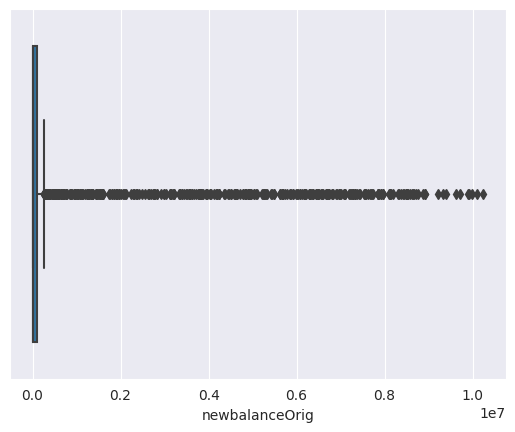

In [178]:
sns.boxplot(x=df["newbalanceOrig"])

<Axes: xlabel='oldbalanceDest'>

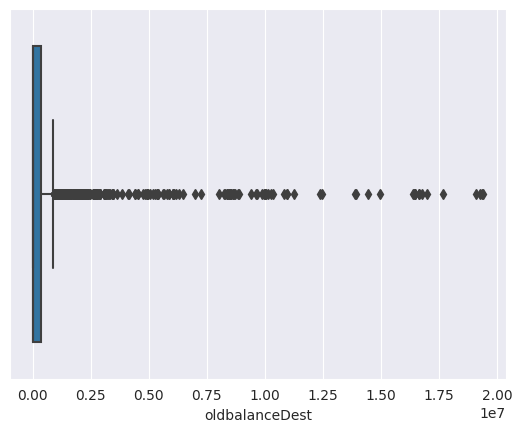

In [179]:
sns.boxplot(x=df["oldbalanceDest"])

<Axes: xlabel='newbalanceDest'>

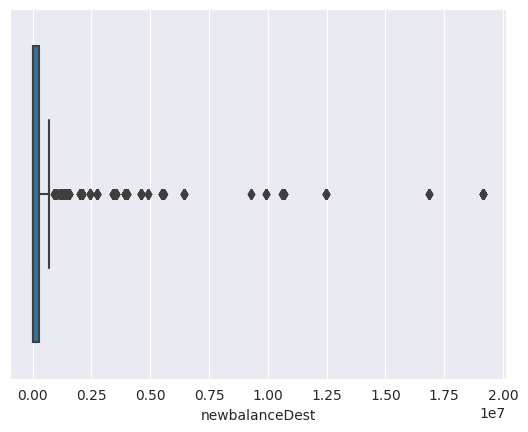

In [148]:
sns.boxplot(x=df["newbalanceDest"])

In [149]:
print(df.type.value_counts())

PAYMENT     998
CASH_OUT    348
CASH_IN     311
TRANSFER    227
DEBIT       116
Name: type, dtype: int64


In [180]:
#Transaction Distribution
import plotly.express as px
type= df["type"].value_counts()
transactions = type.index
quantity = type.values
figure= px.pie(df, values=quantity, names=transactions, title="distribution of transaction type")
figure.show()

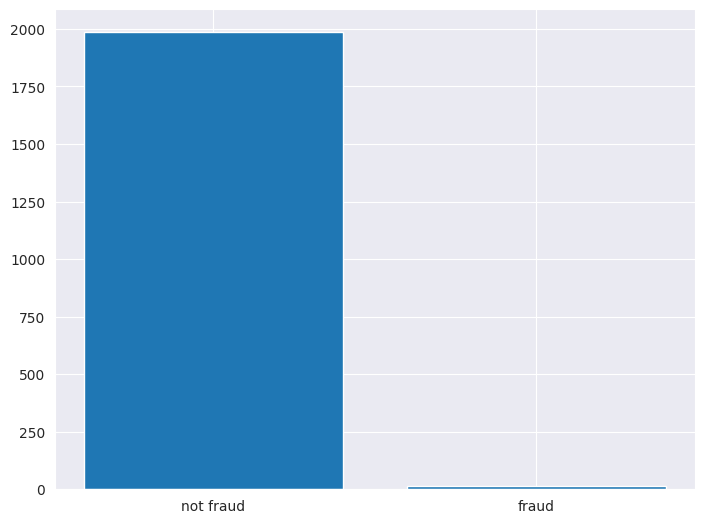

In [181]:
#Fraud vs Not fraud
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fraud = ['not fraud', 'fraud']
count = [1986,14]
ax.bar(fraud,count)
plt.show()

In [182]:
X=df2.drop(columns=['isFraud'],axis=1)
y=df2['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
rf = RandomForestClassifier()
ss=StandardScaler()

X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

rf.fit(X_train, y_train)


RandomForestClassifier()

In [184]:
#Define the random forest model and fit the RF model on the train data

models = {}

models['Random_Forest'] = RandomForestClassifier(n_estimators=10)
models['Logistic_Regression'] = LogisticRegression()

In [185]:
accuracy, precision, recall, f1 = {}, {}, {}, {},

for key in models.keys():
    models[key].fit(X_train, y_train)
    pred = models[key].predict(X_test)
    
    accuracy[key] = accuracy_score(pred, y_test)
    precision[key] = precision_score(pred, y_test)
    recall[key] = recall_score(pred, y_test)
    f1[key] = f1_score(pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



In [186]:
#Evaluate the models
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])

df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1
Random_Forest,0.9850,0.0,0.0,0.0
Logistic_Regression,0.9875,0.0,0.0,0.0


In [187]:
accuracy = accuracy_score(y_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [188]:
# RF model fit with OOB
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [189]:
# Evaluate OOB score for randomforest classifier
oob_score = rf.oob_score_
print("OOB score:", oob_score)

OOB score: 0.994375


In [190]:
#hyper-paramter tuning for Random Forest
from sklearn.metrics import classification_report

In [191]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
    #,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [5, 10, 15, 20]})

In [192]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 236}


In [193]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)


Best hyperparameters: {'n_estimators': 10}
Best score: 0.994375


In [194]:
# Define the scoring metric

scoring = {'Accuracy': 'Precision', 'Recall': 'F1'}
print(scoring)


{'Accuracy': 'Precision', 'Recall': 'F1'}


<Axes: >

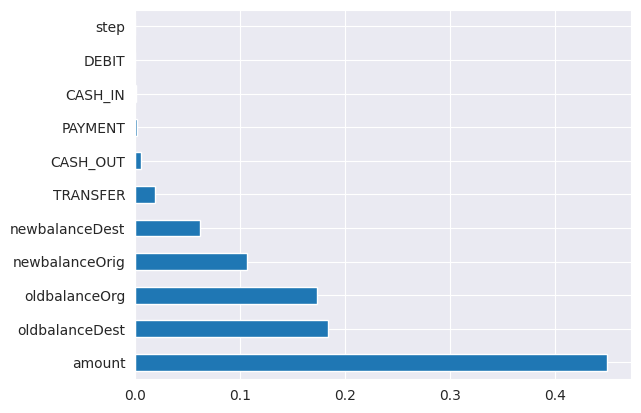

In [195]:
feat_importances = pd.Series(models['Random_Forest'].feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')